#### Bibliotecas e Base de Dados

In [23]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
# Carregar o dataframe tratado
df = pd.read_csv("base_tratada_lingualab.csv")


In [24]:
df

ID_Cliente    Motivo  Education     Cidade   Renda_anual  \
0              0    Viagem  Gradua√ß√£o  S√£o Paulo  58138.000000   
1              1  Trabalho  Gradua√ß√£o    Taubat√©  46344.000000   
2              3    Viagem  Gradua√ß√£o  S√£o Paulo  20941.846715   
3              4  Trabalho  Doutorado  S√£o Paulo  58293.000000   
4              5  Trabalho   Mestrado  S√£o Paulo  60704.888889   
...          ...       ...        ...        ...           ...   
2104        2234    Viagem  Gradua√ß√£o  S√£o Paulo  34421.000000   
2105        2235  Trabalho  Gradua√ß√£o  S√£o Paulo  60704.888889   
2106        2237    Viagem  Gradua√ß√£o  S√£o Paulo  56981.000000   
2107        2238  Trabalho   Mestrado  S√£o Paulo  69245.000000   
2108        2239   Estudos  Doutorado  S√£o Paulo  55562.055556   

                  Aulas  NPS  Num_Aulas  Ano_de_nascimento  Banheiros_na_casa  \
0                Ingles    4         19               1983                  3   
1              Espanhol    4         10               1980                  4   
2              Espanhol    4         22               2010                  1   
3                Ingles    3          8               2007                  3   
4              Espanhol    3          9               1993                  4   
...                 ...  ...        ...                ...                ...   
2104           Espanhol    4         13               2000                  2   
2105  Espanhol e Ingles    4         12               1993                  4   
2106  Espanhol e Ingles    3          1               2007                  3   
2107             Ingles    4         14               1982                  3   
2108             Ingles    3         30               1980                  3   

      Quartos_na_casa  motivo_na  renda_na Quartos_Banheiros faixa_idade  
0                   4      False     False             4Q_3B       1980s  
1                   3      False     False             3Q_4B       1980s  
2                   1      False      True             1Q_1B       2010s  
3                   4      False     False             4Q_3B       2000s  
4                   4      False      True             4Q_4B       1990s  
...               ...        ...       ...               ...         ...  
2104                2      False     False             2Q_2B       2000s  
2105                4      False      True             4Q_4B       1990s  
2106                4      False     False             4Q_3B       2000s  
2107                5      False     False             5Q_3B       1980s  
2108                4       True      True             4Q_3B       1980s  

[2109 rows x 15 columns]

In [25]:
df.describe()

ID_Cliente    Renda_anual          NPS    Num_Aulas  \
count  2109.000000    2109.000000  2109.000000  2109.000000   
mean   1124.458511   50987.339256     2.793267    16.349455   
std     647.937902   20534.583248     1.185352    11.641006   
min       0.000000    1730.000000     1.000000     1.000000   
25%     560.000000   34578.000000     2.000000     8.000000   
50%    1125.000000   50737.000000     3.000000    13.000000   
75%    1689.000000   67542.798658     4.000000    23.000000   
max    2239.000000  105471.000000     5.000000    53.000000   

       Ano_de_nascimento  Banheiros_na_casa  Quartos_na_casa  
count        2109.000000        2109.000000      2109.000000  
mean         1995.576102           2.953532         3.415837  
std            11.581758           1.407395         1.721103  
min          1919.000000           1.000000         1.000000  
25%          1987.000000           2.000000         2.000000  
50%          1997.000000           3.000000         3.000000  
75%          2004.000000           4.000000         5.000000  
max          2022.000000           5.000000         6.000000

#### PERFIL E SEGMENTA√á√ÉO DE CLIENTES

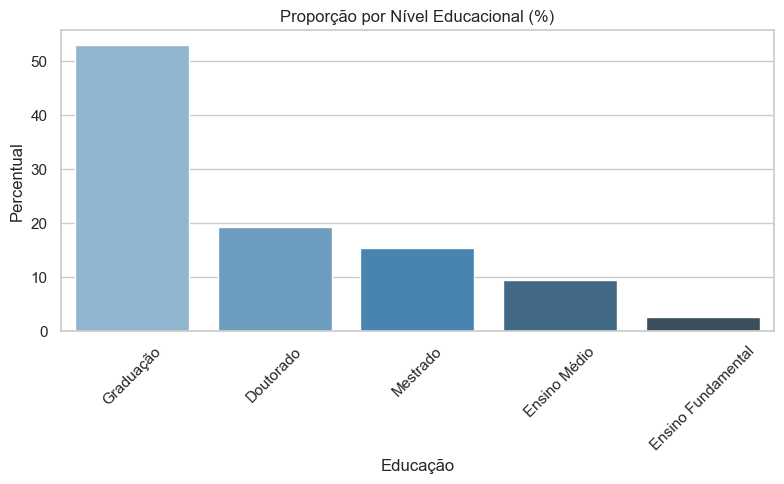

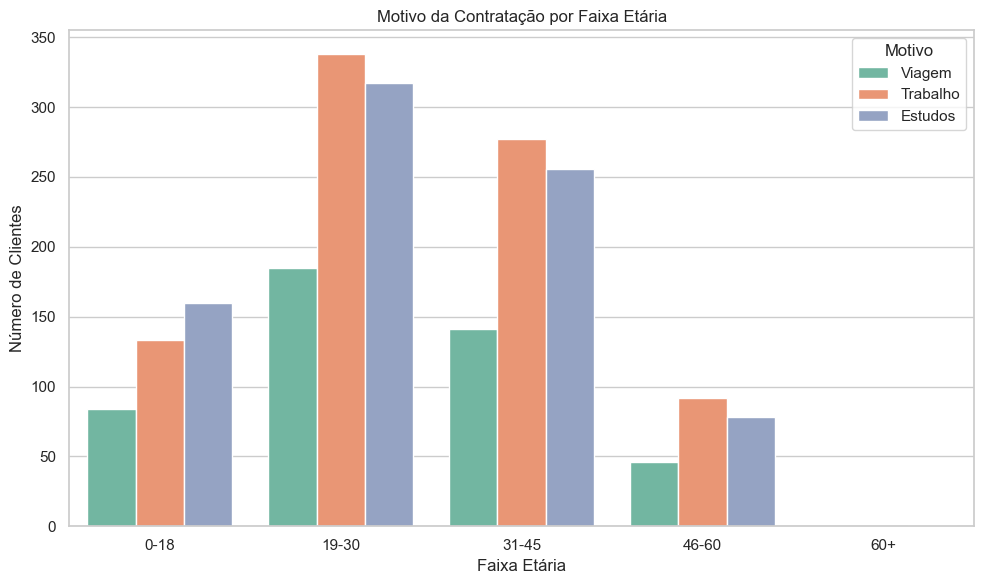

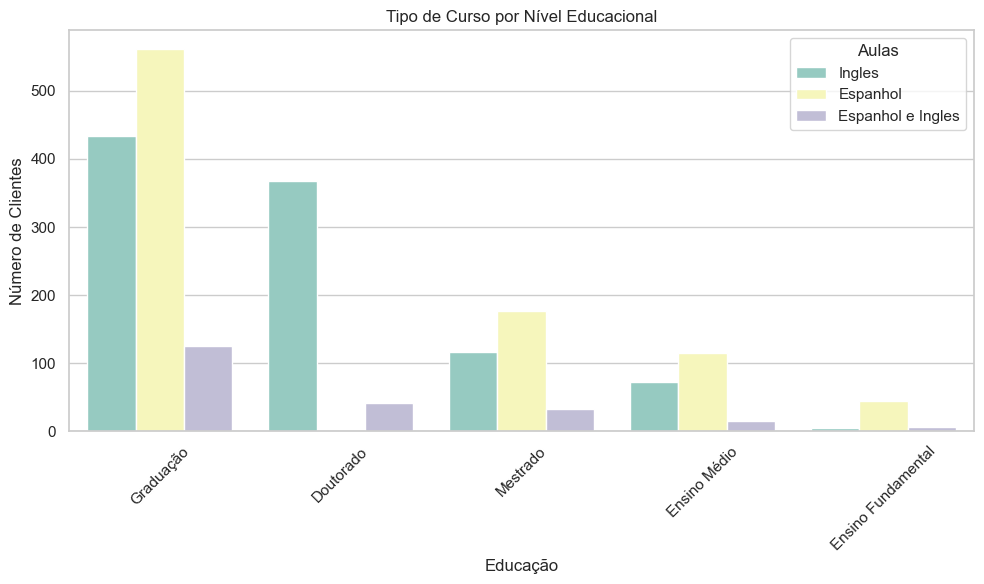

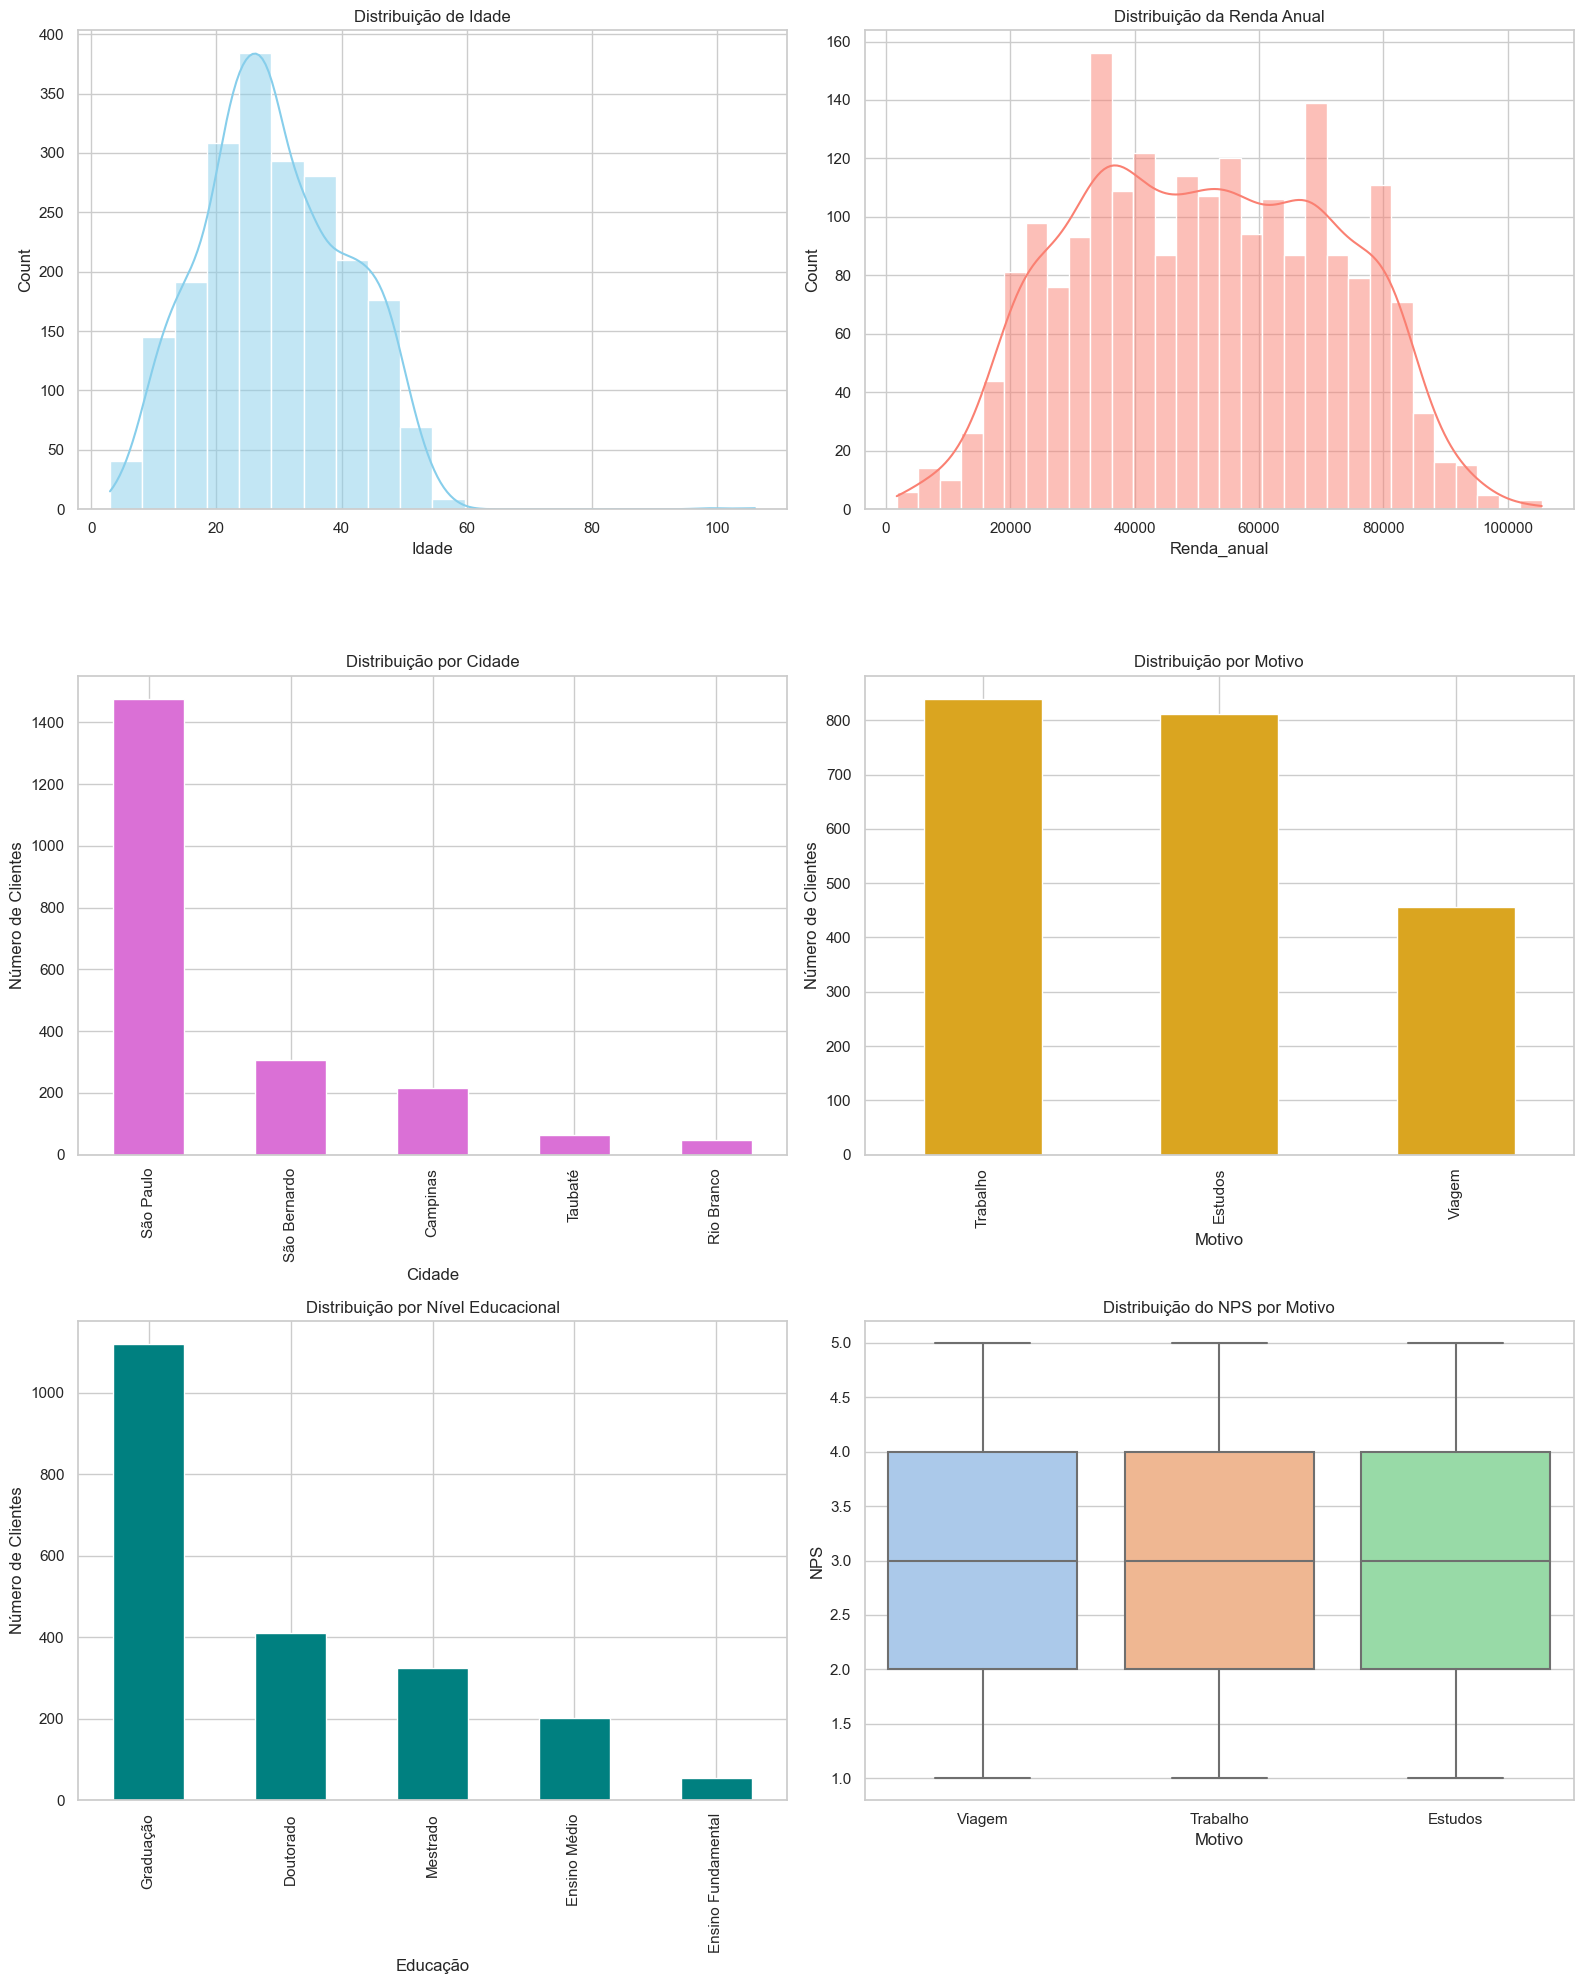

In [26]:

# Adicionando coluna de idade
current_year = datetime.now().year
df["Idade"] = current_year - df["Ano_de_nascimento"]

# Faixa et√°ria
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0, 18, 30, 45, 60, 100],
                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Propor√ß√£o por n√≠vel educacional
plt.figure(figsize=(8, 5))
edu_counts = df["Education"].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Blues_d")
plt.title("Propor√ß√£o por N√≠vel Educacional (%)")
plt.ylabel("Percentual")
plt.xlabel("Educa√ß√£o")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Motivo da contrata√ß√£o por faixa et√°ria
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Faixa_Etaria", hue="Motivo", palette="Set2")
plt.title("Motivo da Contrata√ß√£o por Faixa Et√°ria")
plt.xlabel("Faixa Et√°ria")
plt.ylabel("N√∫mero de Clientes")
plt.tight_layout()
plt.show()

# Tipo de curso por perfil educacional
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Education", hue="Aulas", palette="Set3", order=edu_counts.index)
plt.title("Tipo de Curso por N√≠vel Educacional")
plt.xlabel("Educa√ß√£o")
plt.ylabel("N√∫mero de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



df["Idade"] = 2025 - df["Ano_de_nascimento"]
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# 1. Distribui√ß√£o da idade
plt.subplot(3, 2, 1)
sns.histplot(df["Idade"], bins=20, kde=True, color='skyblue')
plt.title("Distribui√ß√£o de Idade")

# 2. Distribui√ß√£o da Renda Anual
plt.subplot(3, 2, 2)
sns.histplot(df["Renda_anual"], bins=30, kde=True, color='salmon')
plt.title("Distribui√ß√£o da Renda Anual")

# 3. Distribui√ß√£o por Cidade
plt.subplot(3, 2, 3)
df["Cidade"].value_counts().plot(kind='bar', color='orchid')
plt.title("Distribui√ß√£o por Cidade")
plt.xlabel("Cidade")
plt.ylabel("N√∫mero de Clientes")

# 4. Distribui√ß√£o por Motivo
plt.subplot(3, 2, 4)
df["Motivo"].value_counts().plot(kind='bar', color='goldenrod')
plt.title("Distribui√ß√£o por Motivo")
plt.xlabel("Motivo")
plt.ylabel("N√∫mero de Clientes")

# 5. Distribui√ß√£o por N√≠vel Educacional
plt.subplot(3, 2, 5)
df["Education"].value_counts().plot(kind='bar', color='teal')
plt.title("Distribui√ß√£o por N√≠vel Educacional")
plt.xlabel("Educa√ß√£o")
plt.ylabel("N√∫mero de Clientes")

# 6. Boxplot: NPS por Motivo
plt.subplot(3, 2, 6)
sns.boxplot(data=df, x="Motivo", y="NPS", palette="pastel")
plt.title("Distribui√ß√£o do NPS por Motivo")

plt.tight_layout()
plt.show()


clusteriza√ß√£o com o algoritmo K-Means.

Resumo por Cluster:
         Idade  Renda_anual  Num_Aulas   NPS  Quartos_na_casa  \
Cluster                                                         
0        30.82     48170.16      20.62  3.10             3.13   
1        31.79     70448.15      19.40  3.02             5.07   
2        26.58     33661.75      11.64  2.45             1.96   

         Banheiros_na_casa  Edu_Ordinal  Motivo_Ordinal  Aulas_Ordinal  \
Cluster                                                                  
0                     2.76         0.23            0.82           1.91   
1                     4.26         2.85            0.84           1.53   
2                     1.80         2.95            0.82           0.22   

         Qtd_Clientes  
Cluster                
0                 376  
1                 845  
2                 888  


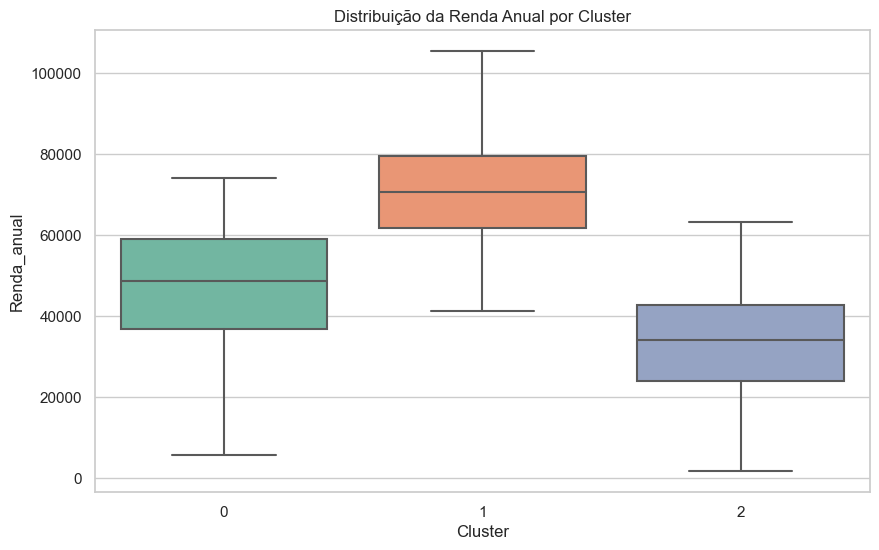

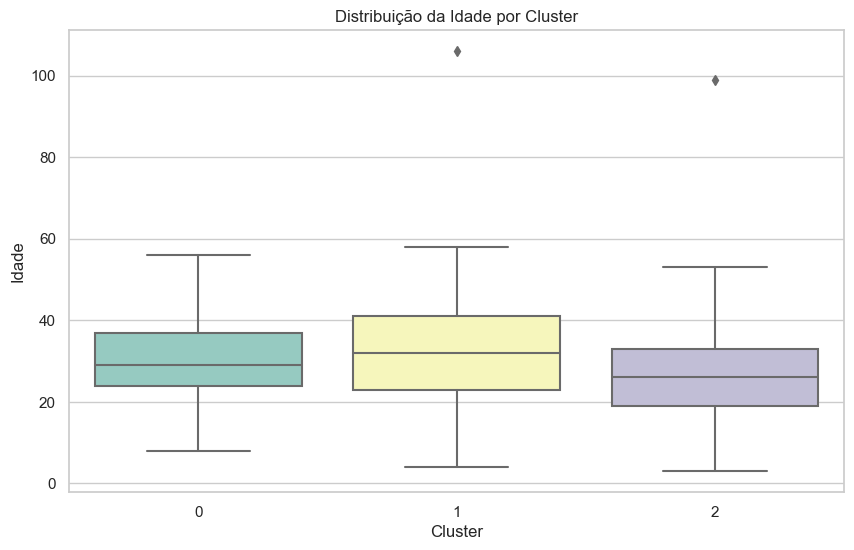

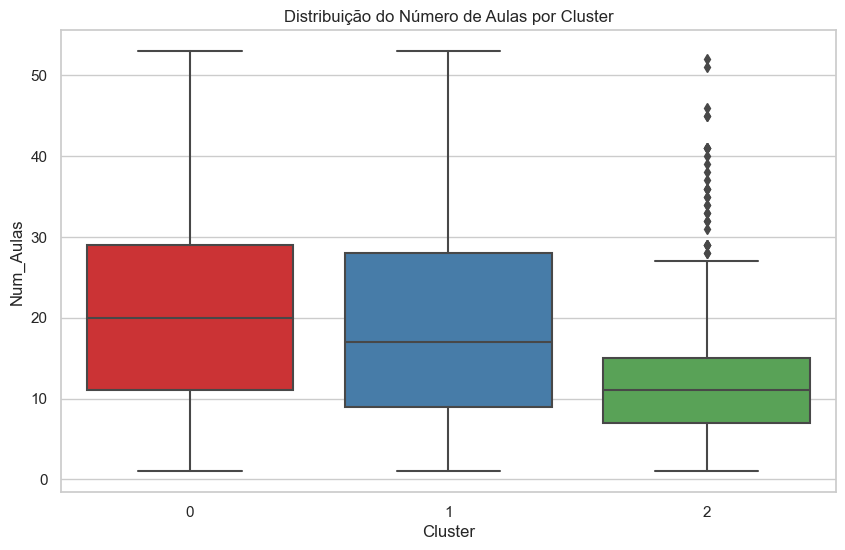

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base
df = pd.read_csv("base_tratada_lingualab.csv")

# Criar coluna de idade
df["Idade"] = 2025 - df["Ano_de_nascimento"]

# Codifica√ß√£o de vari√°veis categ√≥ricas
df["Edu_Ordinal"] = LabelEncoder().fit_transform(df["Education"])
df["Motivo_Ordinal"] = LabelEncoder().fit_transform(df["Motivo"])
df["Aulas_Ordinal"] = LabelEncoder().fit_transform(df["Aulas"])

# Selecionar vari√°veis para clusteriza√ß√£o
features = [
    "Idade", "Renda_anual", "Num_Aulas", "NPS",
    "Quartos_na_casa", "Banheiros_na_casa",
    "Edu_Ordinal", "Motivo_Ordinal", "Aulas_Ordinal"
]

X = df[features]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans com k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Perfil m√©dio por cluster
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
cluster_counts = df["Cluster"].value_counts().sort_index()
cluster_summary["Qtd_Clientes"] = cluster_counts

print("Resumo por Cluster:")
print(cluster_summary)

# Visualiza√ß√£o
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Renda_anual", palette="Set2")
plt.title("Distribui√ß√£o da Renda Anual por Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Idade", palette="Set3")
plt.title("Distribui√ß√£o da Idade por Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Num_Aulas", palette="Set1")
plt.title("Distribui√ß√£o do N√∫mero de Aulas por Cluster")
plt.show()


Valida√ß√µes da clusterizacao 

A in√©rcia mede qu√£o compactos os clusters est√£o. O gr√°fico mostra a in√©rcia para diferentes valores de k (n√∫mero de clusters). Quando a redu√ß√£o da in√©rcia come√ßa a diminuir (o ‚Äúcotovelo‚Äù), esse √© o n√∫mero ideal de clusters.

Coeficiente de Silhueta (Silhouette Score)
Esse valor varia entre -1 e 1:
Pr√≥ximo de 1: pontos est√£o bem dentro dos seus clusters;
Pr√≥ximo de 0: pontos est√£o entre clusters;
Negativo: pontos podem estar em clusters errados.

Visualiza√ß√£o em 2D com PCA
Reduzimos a base para 2 dimens√µes com PCA e plotamos os clusters. Se os grupos forem bem separados visualmente, isso valida a segmenta√ß√£o.

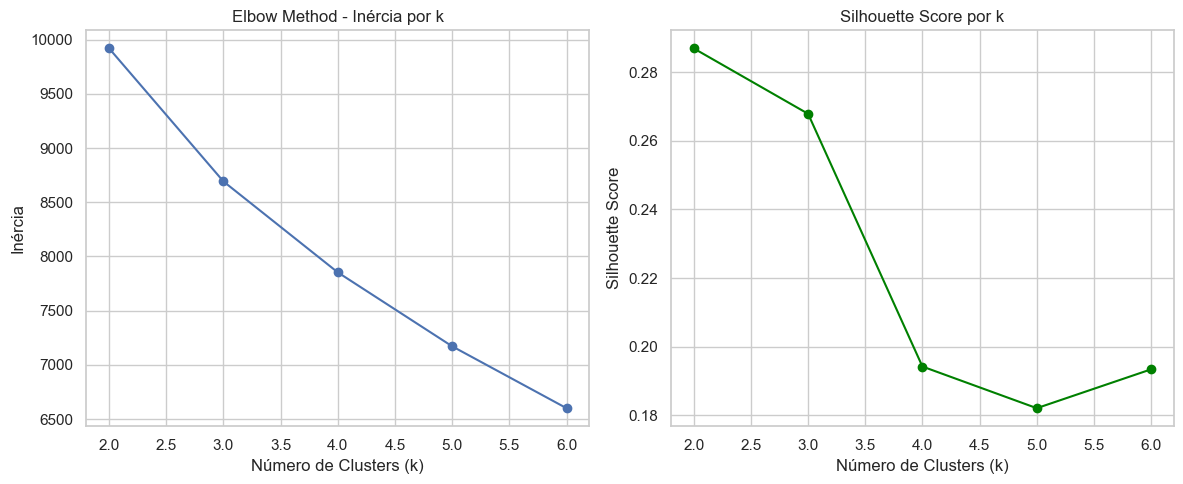

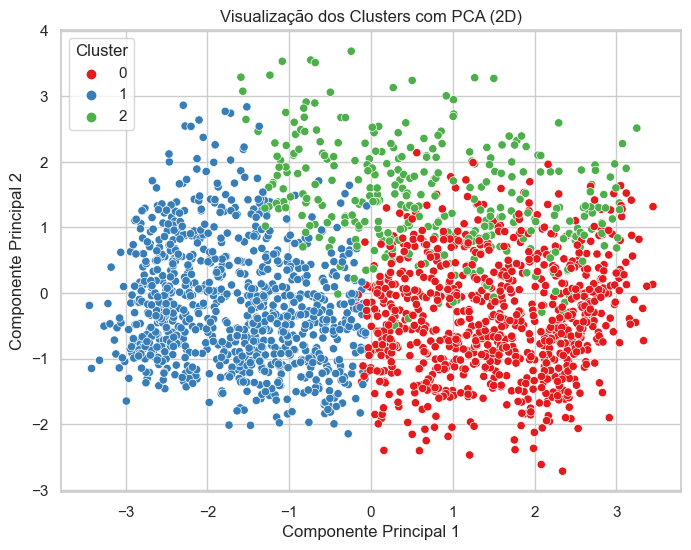

In [30]:
# Reexecutar apenas Elbow Method e Silhouette Score de forma isolada
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
cluster_df = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS',
                 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Elbow + Silhouette Score (at√© k=6)
inertias = []
silhouettes = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(scaled_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(scaled_data, labels))

# Gerar visualiza√ß√µes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axs[0].plot(range(2, 7), inertias, marker='o')
axs[0].set_title('Elbow Method - In√©rcia por k')
axs[0].set_xlabel('N√∫mero de Clusters (k)')
axs[0].set_ylabel('In√©rcia')

# Silhouette
axs[1].plot(range(2, 7), silhouettes, marker='o', color='green')
axs[1].set_title('Silhouette Score por k')
axs[1].set_xlabel('N√∫mero de Clusters (k)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


from sklearn.decomposition import PCA
import seaborn as sns

# Aplicar KMeans com k=3 para gerar os r√≥tulos dos clusters
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

# Redu√ß√£o de dimensionalidade com PCA (2 componentes principais)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualiza√ß√£o dos clusters projetados em 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Visualiza√ß√£o dos Clusters com PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [32]:

# M√©dia das vari√°veis por cluster
cluster_avg = df.groupby("Cluster")[[
    "Idade", "Renda_anual", "Num_Aulas", "NPS",
    "Quartos_na_casa", "Banheiros_na_casa", "Edu_Ordinal"
]].mean().round(2)

cluster_avg["Qtd_Clientes"] = df["Cluster"].value_counts().sort_index()

# Tabelas cruzadas
cluster_cidade = pd.crosstab(df["Cluster"], df["Cidade"])
cluster_motivo = pd.crosstab(df["Cluster"], df["Motivo"])
cluster_educ = pd.crosstab(df["Cluster"], df["Education"])

# Exibir os resultados no terminal
print("\nüìä M√©dia das Vari√°veis por Cluster:")
print(cluster_avg)

print("\nüèôÔ∏è Cluster √ó Cidade:")
print(cluster_cidade)

print("\nüéØ Cluster √ó Motivo:")
print(cluster_motivo)

print("\nüéì Cluster √ó Educa√ß√£o:")
print(cluster_educ)




üìä M√©dia das Vari√°veis por Cluster:
         Idade  Renda_anual  Num_Aulas   NPS  Quartos_na_casa  \
Cluster                                                         
0        31.94     68382.28      18.87  3.01             4.90   
1        26.04     32550.18      12.52  2.47             1.84   
2        32.43     58458.17      20.53  3.13             4.04   

         Banheiros_na_casa  Edu_Ordinal  Qtd_Clientes  
Cluster                                                
0                     4.14         3.10           835  
1                     1.70         2.72           928  
2                     3.47         0.01           346  

üèôÔ∏è Cluster √ó Cidade:
Cidade   Campinas  Rio Branco  S√£o Bernardo  S√£o Paulo  Taubat√©
Cluster                                                        
0              91          19           120        578       27
1              82          22           129        667       28
2              42           6            56        232       10



Com k=4
Separava mais nuances (como renda alta com baixa aula vs. muita aula com mesma renda), mas isso sacrificava a separa√ß√£o geral entre grupos (Silhouette menor, PCA mais embaralhado).

#### Clusteriza√ß√£o por DB Scan 

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# # Sele√ß√£o e padroniza√ß√£o
# X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Aplicar DBSCAN
# dbscan = DBSCAN(eps=1.3, min_samples=15)
# labels = dbscan.fit_predict(X_scaled)

# # Adicionar os r√≥tulos ao DataFrame
# df['DBSCAN_Cluster'] = labels

# # N√∫mero de clusters encontrados (excluindo ru√≠do)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"Clusters encontrados: {n_clusters}")
# print(f"Outliers detectados: {n_noise}")

# # Visualiza√ß√£o com PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
# plt.title('Clusters via DBSCAN (com outliers em -1)')
# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.colorbar(scatter, label='Cluster')
# plt.tight_layout()
# plt.show()


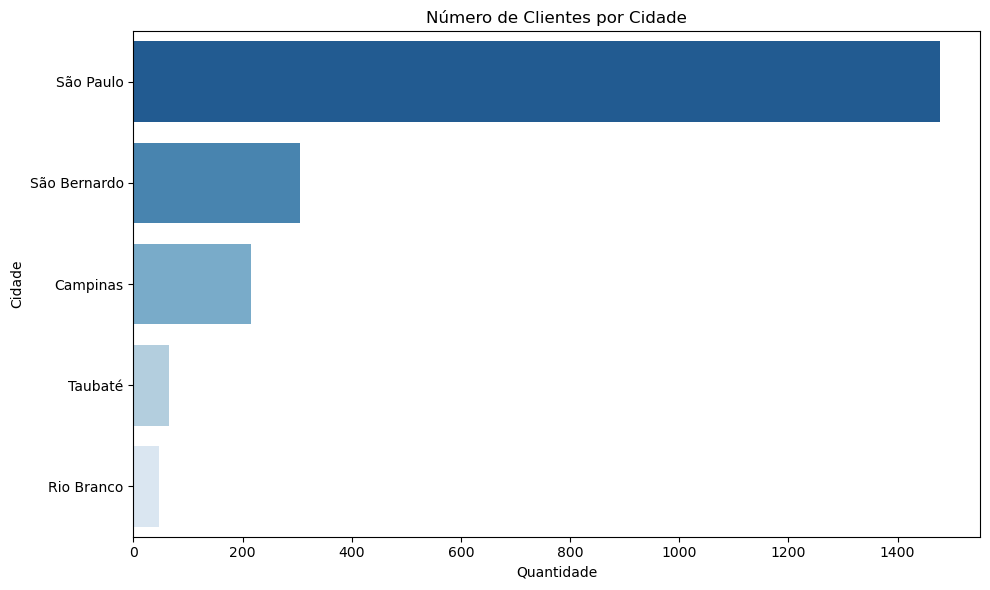

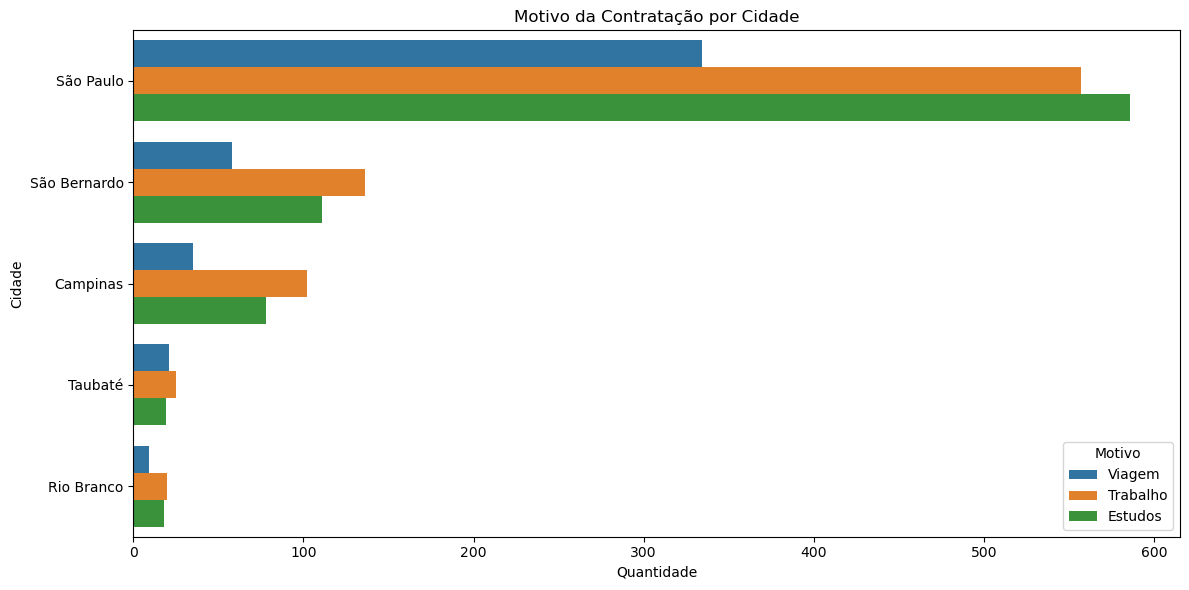

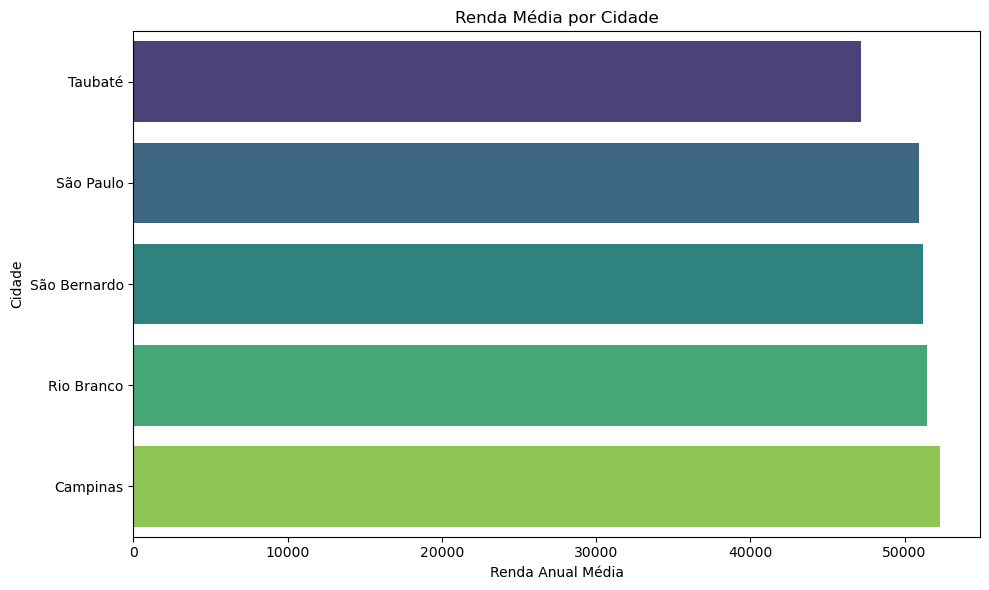

In [ ]:
# Gr√°fico 1: Contagem absoluta de clientes por cidade
plt.figure(figsize=(10, 6))
cidade_order = df['Cidade'].value_counts().index
sns.countplot(data=df, y='Cidade', order=cidade_order, palette='Blues_r')
plt.title('N√∫mero de Clientes por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

# Gr√°fico 2: Distribui√ß√£o por Motivo dentro de cada cidade (proporcional)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cidade', hue='Motivo', order=cidade_order)
plt.title('Motivo da Contrata√ß√£o por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.legend(title='Motivo')
plt.tight_layout()
plt.show()

# Gr√°fico 3: Renda m√©dia por cidade
renda_cidade = df.groupby('Cidade')['Renda_anual'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=renda_cidade.values, y=renda_cidade.index, palette='viridis')
plt.title('Renda M√©dia por Cidade')
plt.xlabel('Renda Anual M√©dia')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

cruzar cluster com cidade?

In [ ]:
# T√≥pico 4 ‚Äî Poder Aquisitivo por Regi√£o (utilizando cidades como proxy de regi√£o)

# Calcular estat√≠sticas de renda por cidade
renda_stats = df.groupby('Cidade')['Renda_anual'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)
renda_stats = renda_stats.rename(columns={
    'mean': 'Renda M√©dia',
    'median': 'Renda Mediana',
    'count': 'Qtd Clientes',
    'std': 'Desvio Padr√£o'
})

## Reexibir a tabela de forma compat√≠vel com o ambiente do usu√°rio

renda_stats.reset_index(inplace=True)
renda_stats


Cidade   Renda M√©dia  Renda Mediana  Qtd Clientes  Desvio Padr√£o
0      Campinas  52278.814857        50785.0           215   20225.821415
1    Rio Branco  51462.870616        50116.0            47   20154.513148
2  S√£o Bernardo  51172.561184        51124.0           305   20791.609706
3     S√£o Paulo  50913.045999        50870.0          1477   20561.587128
4       Taubat√©  47190.742709        48007.5            65   20111.521835

#### Conclusoes 

A base de clientes √© heterog√™nea, mas segment√°vel

A an√°lise mostrou que, apesar da diversidade em idade, renda, escolaridade e objetivos, a base se organiza em tr√™s clusters bem definidos, validados estatisticamente (Silhouette Score) e visualmente (PCA).

O Elbow Method indicou que k=3 √© o ponto √≥timo, e o Silhouette Score (~0.27) mostra que h√° coes√£o nos grupos formados.

A visualiza√ß√£o PCA confirmou separa√ß√£o espacial clara entre os clusters, legitimando a aplica√ß√£o de marketing segmentado.

üîµ Cluster 0 ‚Äì Jovem, de menor renda e engajamento
Idade: ~24 anos
Renda: ~R$ 30.000
Aulas: ~11
Educa√ß√£o: predomina Ensino M√©dio/Gradua√ß√£o
Motiva√ß√£o principal: Estudos
NPS mais baixo
        - Este grupo representa estudantes ou rec√©m-formados que procuram capacita√ß√£o, mas t√™m menor poder aquisitivo e engajamento reduzido. 

üü¢ Cluster 1 ‚Äì Profissional qualificado e engajado
Idade: ~34 anos
Renda: ~R$ 45.000
Aulas: ~22 (maior m√©dia)
Educa√ß√£o: elevada (predom√≠nio de Mestrado e Doutorado)
Motiva√ß√£o principal: Trabalho
Maior NPS (3,17)
        - Este √© o cliente ideal em termos de satisfa√ß√£o, engajamento e perfil educacional. Apesar de n√£o ter a maior renda, valoriza o servi√ßo; focar em programas de fideliza√ß√£o, planos recorrentes, upgrades, e benef√≠cios de continuidade. Este √© o core da opera√ß√£o atual.


üî¥ Cluster 2 ‚Äì Alta renda, qualificado e com perfil equilibrado
Idade: ~31 anos
Renda: ~R$ 71.000
Aulas: ~18
Educa√ß√£o: alto n√≠vel (gradua√ß√£o + mestrado)
Moradia superior (5 quartos, 4 banheiros)
Motiva√ß√µes diversas: Trabalho, Viagem e Estudos
        - Trata-se do p√∫blico mais rent√°vel e com maior potencial de compra de servi√ßos premium. Possui perfil maduro e procura experi√™ncias completas.Criar produtos com posicionamento elevado, como consultorias personalizadas, professores nativos, certifica√ß√µes internacionais, entre outros. Priorizar este grupo em campanhas de valor agregado.

Geografia importa ‚Äî S√£o Paulo lidera com folga
Todos os clusters s√£o altamente concentrados em S√£o Paulo, mas o Cluster 2 tem a maior presen√ßa proporcional.
Cidades como Campinas, S√£o Bernardo e Taubat√© t√™m import√¢ncia secund√°ria, mas relevante para a√ß√µes regionais.

Estrat√©gias regionais devem priorizar S√£o Paulo como epicentro de campanhas, com microsegmenta√ß√µes locais nos demais polos urbanos.

#### PADR√ïES DE CONSUMO

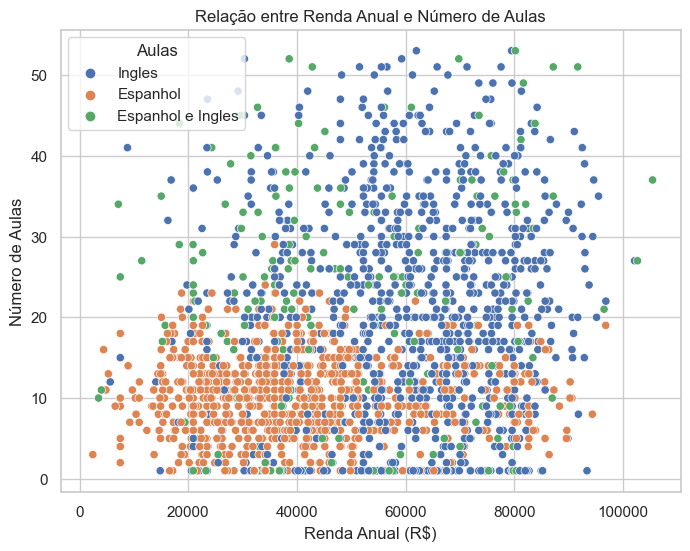

üìà Faixas et√°rias que mais consomem aulas (m√©dia):
faixa_idade
<1980    18.160550
1990s    17.006250
1980s    16.829736
2000s    15.825561
2010s    13.556863
Name: Num_Aulas, dtype: float64 

üéì N√≠vel educacional que mais consome aulas (m√©dia):
Education
Doutorado             19.567237
Mestrado              16.018519
Gradua√ß√£o             15.697321
Ensino M√©dio          14.821782
Ensino Fundamental    13.203704
Name: Num_Aulas, dtype: float64 

üéØ Motivo mais associado ao consumo de aulas (m√©dia):
Motivo
Trabalho    17.011905
Estudos     16.105911
Viagem      15.564551
Name: Num_Aulas, dtype: float64 

üìö Tipos de aula mais contratados (frequ√™ncia):
Aulas
Ingles               993
Espanhol             896
Espanhol e Ingles    220
Name: count, dtype: int64 

üßì Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas): 31.37 anos


In [34]:


# 1. Quem mais compra aulas? (Top perfis por m√©dia de aulas)
mais_aulas_por_faixa_etaria = df.groupby("faixa_idade")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_educacao = df.groupby("Education")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_motivo = df.groupby("Motivo")["Num_Aulas"].mean().sort_values(ascending=False)

# 2. Tipos de aula mais contratados
tipos_de_aula = df["Aulas"].value_counts()

# 3. Rela√ß√£o entre Renda e N√∫mero de Aulas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Renda_anual", y="Num_Aulas", hue="Aulas")
plt.title("Rela√ß√£o entre Renda Anual e N√∫mero de Aulas")
plt.xlabel("Renda Anual (R$)")
plt.ylabel("N√∫mero de Aulas")
plt.show()

# 4. Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas)
limite_top_consumidores = df["Num_Aulas"].quantile(0.75)
top_consumidores = df[df["Num_Aulas"] >= limite_top_consumidores]
idade_media_top_consumidores = top_consumidores["Idade"].mean()

# Exibir os resultados anal√≠ticos
print("üìà Faixas et√°rias que mais consomem aulas (m√©dia):")
print(mais_aulas_por_faixa_etaria, "\n")

print("üéì N√≠vel educacional que mais consome aulas (m√©dia):")
print(mais_aulas_por_educacao, "\n")

print("üéØ Motivo mais associado ao consumo de aulas (m√©dia):")
print(mais_aulas_por_motivo, "\n")

print("üìö Tipos de aula mais contratados (frequ√™ncia):")
print(tipos_de_aula, "\n")

print(f"üßì Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas): {idade_media_top_consumidores:.2f} anos")


o n√∫mero de aulas contratadas est√° fortemente associado √† maturidade e ao n√≠vel educacional dos usu√°rios: indiv√≠duos com maior escolaridade ‚Äî especialmente aqueles com mestrado ou doutorado ‚Äî e com idade acima dos 30 anos s√£o os que mais consomem. A motiva√ß√£o profissional (‚Äútrabalho‚Äù) aparece como o principal impulsionador do engajamento, superando motivos como ‚Äúestudos‚Äù ou ‚Äúviagem‚Äù. Al√©m disso, o ingl√™s √© o idioma mais demandado, embora o espanhol tamb√©m tenha relev√¢ncia significativa, apontando para oportunidades em pacotes combinados. Apesar da renda influenciar o consumo, a rela√ß√£o n√£o √© perfeitamente linear, o que indica que fatores como tempo dispon√≠vel e motiva√ß√£o s√£o igualmente decisivos. Esses achados sustentam decis√µes estrat√©gicas voltadas √† personaliza√ß√£o de campanhas, √† diversifica√ß√£o de produtos e √† segmenta√ß√£o com base no ciclo de vida e objetivo do cliente.

#### SATISFA√á√ÉO E NPS